In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('sp500_index.csv', index_col = "Date", parse_dates = True)


In [22]:
df.head()

,S&P500
Date,
2013-05-13,1633.77
2013-05-14,1650.34
2013-05-15,1658.78
2013-05-16,1650.47
2013-05-17,1667.47


In [23]:
df.shape

(2519, 1)

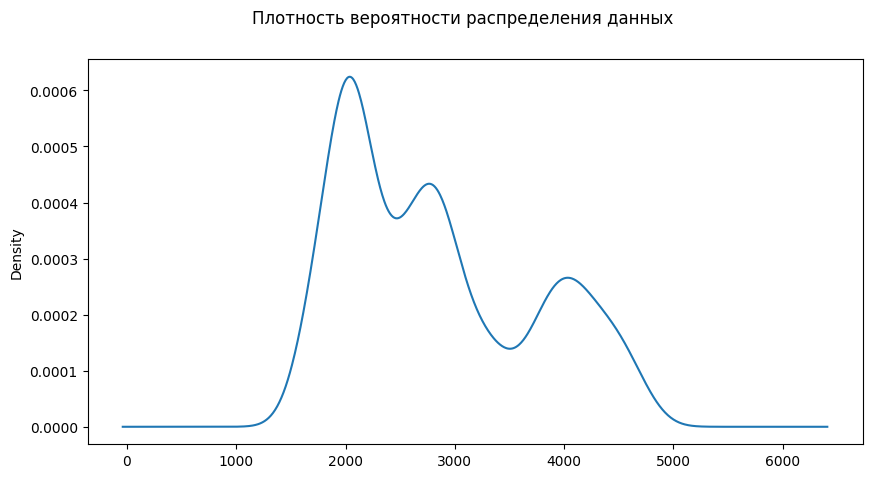

In [24]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
df.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

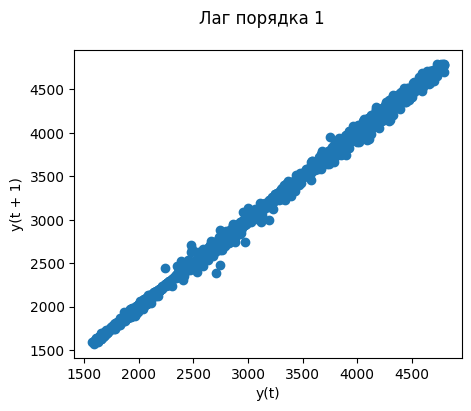

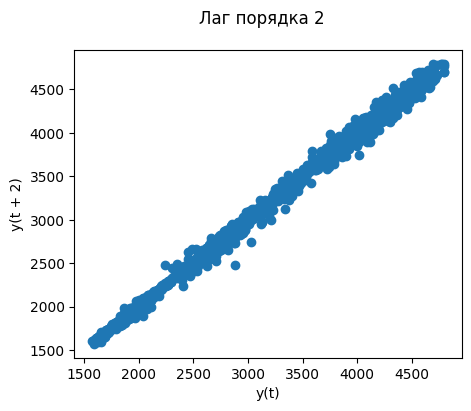

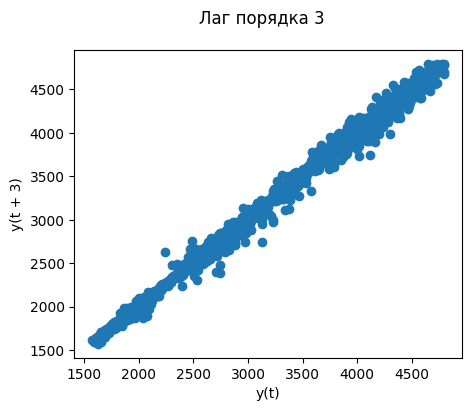

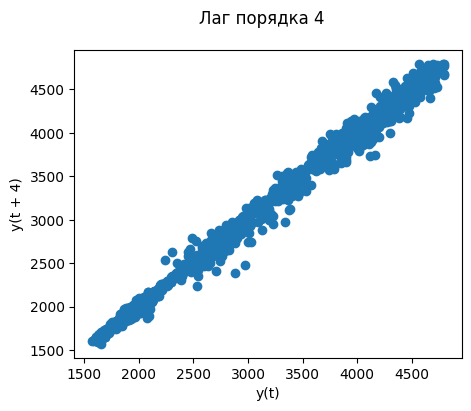

In [25]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(df, lag=i, ax=ax)
    pyplot.show()

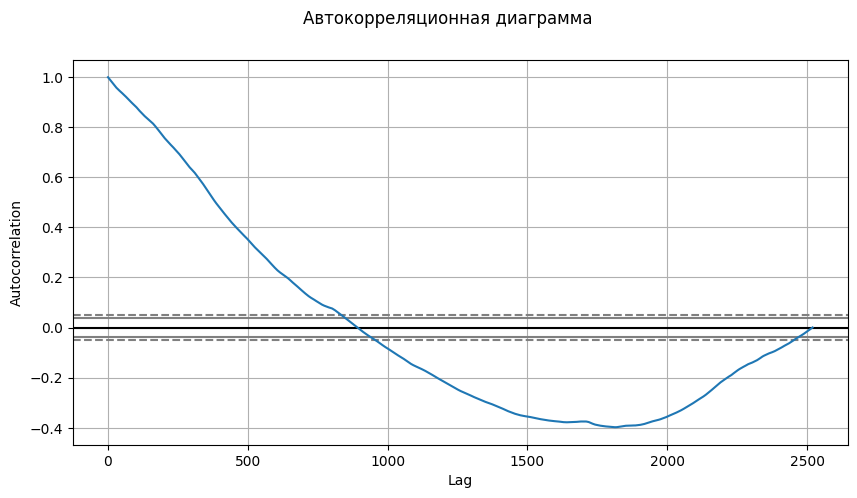

In [26]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(df, ax=ax)
pyplot.show()

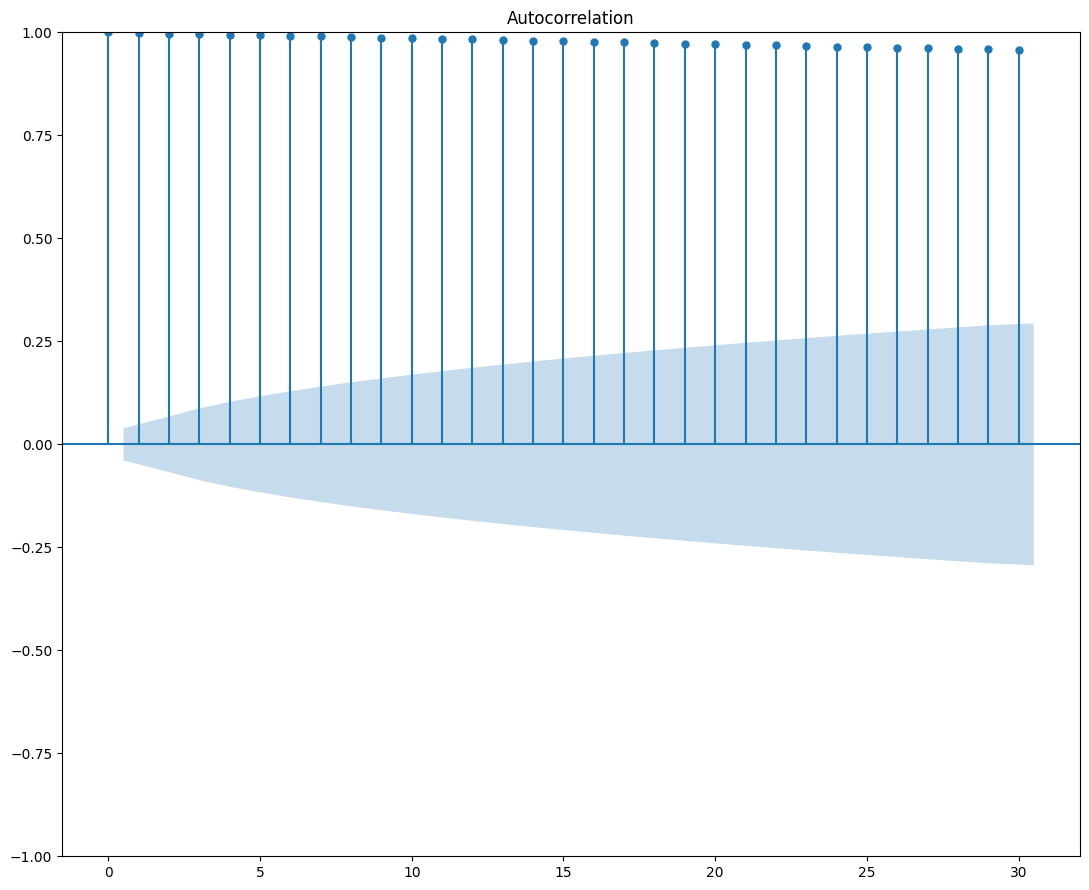

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=30)
plt.tight_layout()

In [28]:
df.index = pd.to_datetime(df.index)

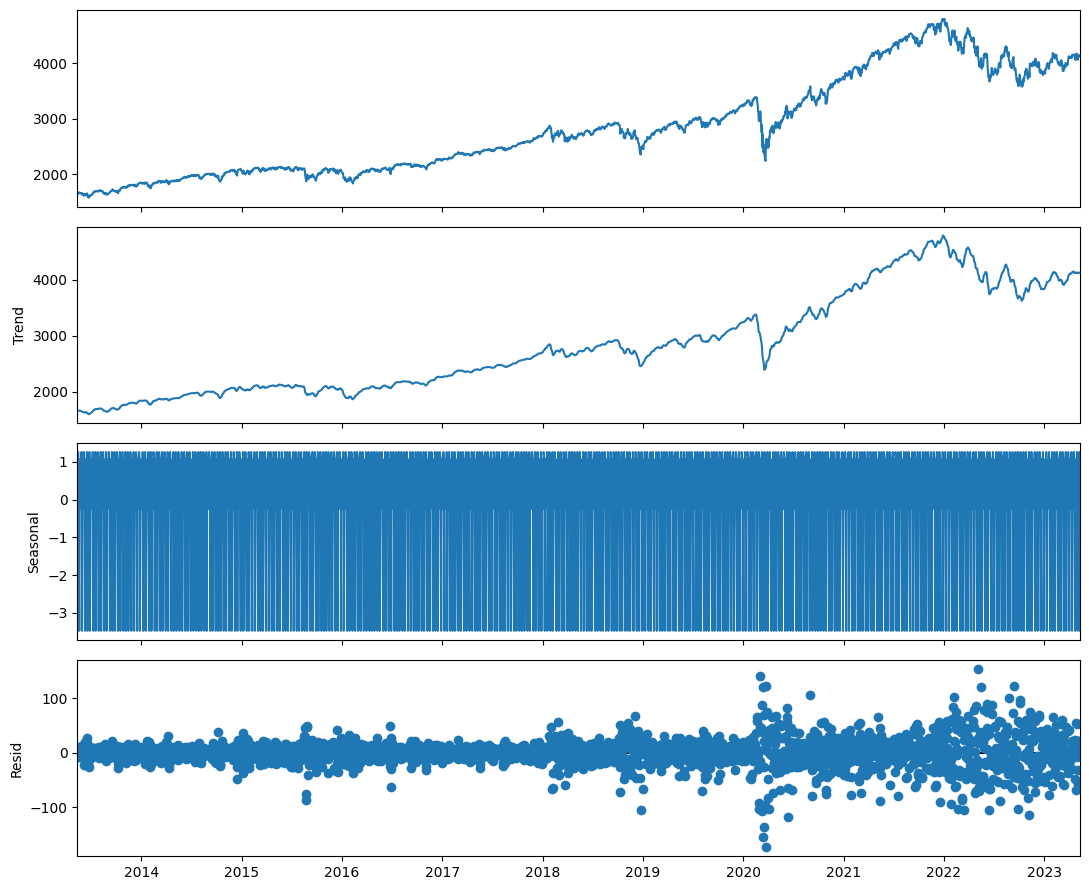

In [29]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о перевозках
decompose = seasonal_decompose(df, period=7)
decompose.plot()
 
plt.show()

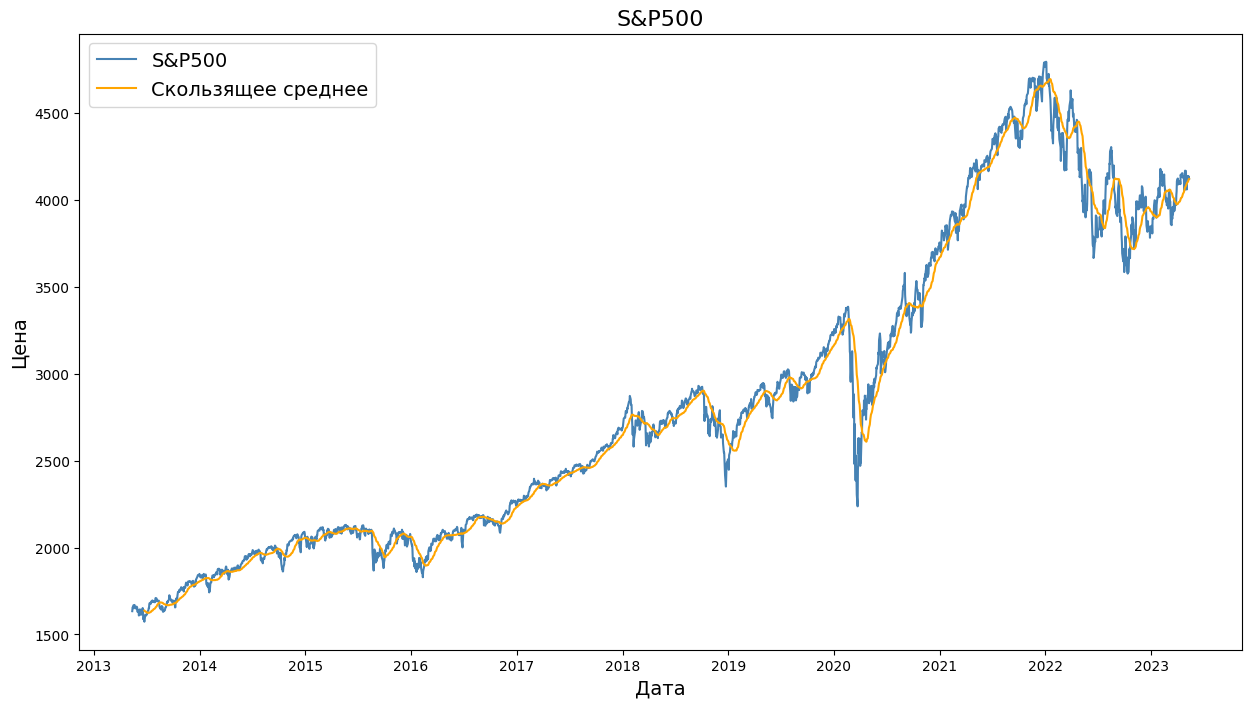

In [30]:
# зададим размер графика
plt.figure(figsize = (15,8))
 
# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(df, label = 'S&P500', color = 'steelblue')
plt.plot(df.rolling(window = 30).mean(), label = 'Скользящее среднее', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.title('S&P500', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

In [31]:
# импортируем необходимую функцию 
from statsmodels.tsa.stattools import adfuller
 
# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(df['S&P500'])
 
# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.8211719352138405


In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [33]:
xnum = list(range(df.shape[0]))
Y = df['S&P500'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]

In [34]:
history_arima = [x for x in train]
history_es = [x for x in train]

In [35]:
arima_order = (6,1,0)

In [36]:
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])

In [37]:
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [38]:
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])

In [39]:
error_es = mean_squared_error(test, predictions_es, squared=False)

In [40]:
df['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
df['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

In [41]:
df['SMA'] = df['S&P500'].rolling(30, min_periods=1).mean()

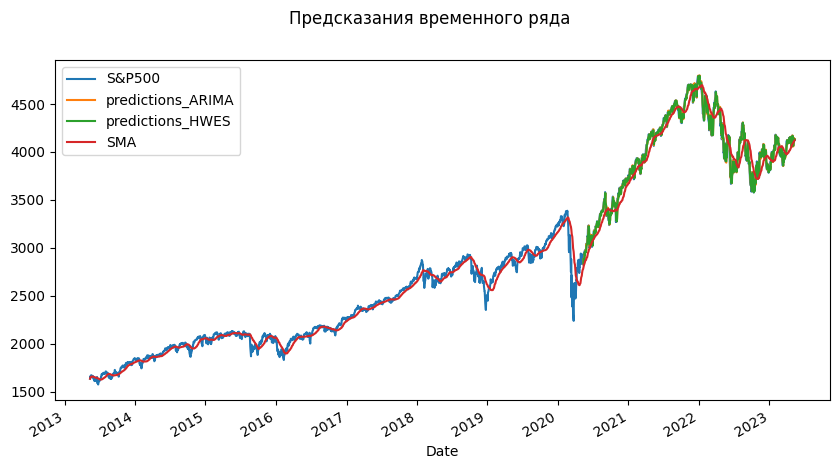

In [42]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
df.plot(ax=ax, legend=True)
pyplot.show()

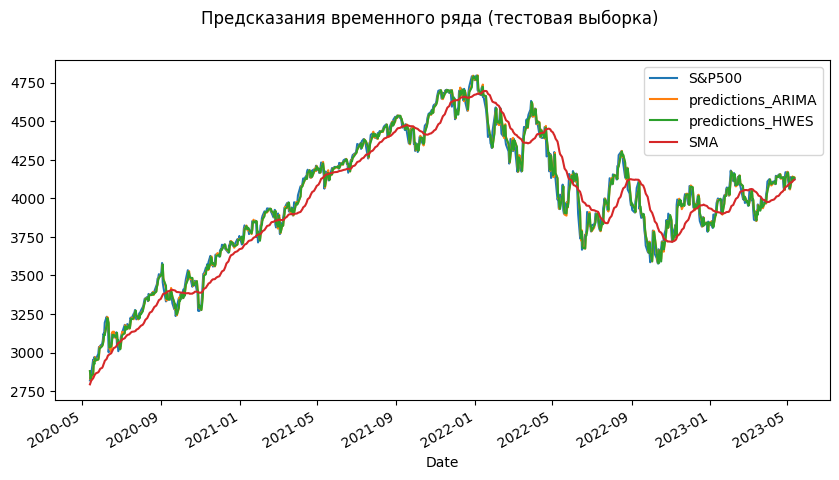

In [43]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
df[train_size:].plot(ax=ax, legend=True)
pyplot.show()

ARIMA и HWES близки к скользящему среднему

In [44]:
from gplearn.genetic import SymbolicRegressor

In [45]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=70, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

In [ ]:
est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

C:\Users\j4ngle\PycharmProjects\ML\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      2.39795e+75       23      1.84345e+06              N/A      2.04m
   1   140.77      1.12188e+19       56           707258              N/A     47.10s
   2    59.27      8.71956e+12       24           608060              N/A     27.23s
   3    43.10      4.74589e+17       25           475930              N/A     22.69s
   4    34.36      1.83251e+10       26           475280              N/A     20.00s
   5    31.79        5.634e+09       39           366322              N/A     18.99s
   6    31.90      7.29323e+08       40           313174              N/A     18.07s
   7    38.65      8.36692e+07       38           282812              N/A     20.07s
   8    42.24      1.73415e+09       40           282600              N/A  

In [40]:
# Предсказания
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:10]

array([40.28938386, 36.55290694, 44.0910671 , 42.43899561, 47.00219962,
       45.03593076, 39.69664985, 46.57498875, 44.92532119, 43.89997191])

In [41]:
df['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

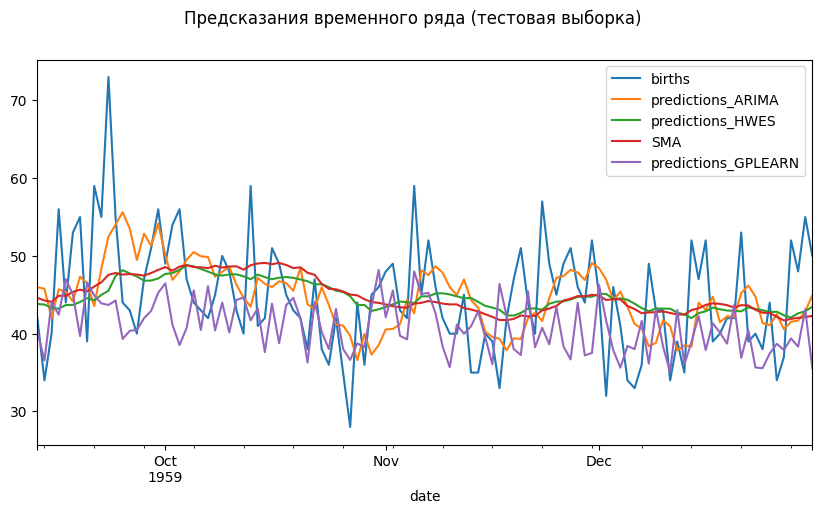

In [42]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
df[train_size:].plot(ax=ax, legend=True)
pyplot.show()